# Day 3: Introduction to Data Analysis with pandas

## Overview

Welcome to Day 3! Today, we'll dive into the `pandas` library, a cornerstone of data manipulation and analysis in Python. We'll learn how to work with fundamental pandas structures like Series and DataFrames, load data from a CSV file (which you will upload), and perform essential tasks like exploring, cleaning, transforming, analyzing, and visualizing data.

**Objectives:**

1.  **Understand pandas Series and DataFrames:** Learn about these core data structures and how to create them.
2.  **Load & Explore Data:** Import data from a CSV file (uploaded by you) and perform initial inspection.
3.  **Data Cleaning:** Handle missing values, duplicates, incorrect data types, and formatting issues using the new dataset.
4.  **Data Transformation:** Modify and reshape data by creating new columns, grouping, sorting, filtering, and selecting subsets using the new dataset.
5.  **Basic Statistics:** Calculate summary statistics to understand data distributions and relationships in the new dataset.
6.  **Basic Visualizations:** Create simple plots directly from pandas DataFrames to visualize patterns in the new dataset.
7.  **Best Practices:** Reinforce the importance of clean, commented, and readable code.

## Setup: Importing Libraries

First, we need to import the necessary libraries. Libraries extend Python's capabilities, providing specialized functions.

In [6]:
# Import pandas for data manipulation and analysis
import pandas as pd

# Import numpy for numerical operations (often used with pandas)
import numpy as np

# Import matplotlib.pyplot for plotting
import matplotlib.pyplot as plt

# Import seaborn for enhanced visualizations (optional but good to know)
import seaborn as sns

print("Libraries imported successfully!")

Matplotlib is building the font cache; this may take a moment.


Libraries imported successfully!


**Library Explanations:**

* **pandas (as pd):** The primary library for data analysis. It provides data structures like DataFrame and Series and functions for reading, writing, cleaning, transforming, and analyzing data. We use `as pd` as a standard convention to refer to pandas with a shorter alias.
* **numpy (as np):** Fundamental package for numerical computation in Python. Pandas is built on top of NumPy. It's particularly useful for array operations and mathematical functions. `np` is the conventional alias.
* **matplotlib.pyplot (as plt):** The most widely used library for creating static, animated, and interactive visualizations in Python. `plt` is the standard alias for its plotting interface.
* **seaborn (as sns):** Built on top of Matplotlib, Seaborn provides a high-level interface for drawing attractive and informative statistical graphics. It often simplifies complex visualizations.

## Introduction to Core Pandas Structures: Series and DataFrame

Before we load our main dataset, let's understand the two fundamental data structures provided by pandas.

### Pandas Series

A **Series** is like a one-dimensional array or list, but with an associated **index**. The index allows us to label and access the data points efficiently. Think of it as a single column in a spreadsheet or table.

Key characteristics:
* One-dimensional.
* Holds data of a single type (integers, floats, strings, etc.).
* Has an index (by default, numerical starting from 0, but can be customized).

In [7]:
# Example: Creating a pandas Series from a Python list
student_marks = [75, 85, 55, 60, 60]
marks_series = pd.Series(student_marks)

print("Simple Pandas Series (Student Marks):")
print(marks_series)

# You can also specify a custom index (e.g., student IDs)
ids = [1, 2, 3, 4, 5]
marks_with_ids = pd.Series(student_marks, index=ids)
print("\nSeries with custom index (IDs):")
print(marks_with_ids)

Simple Pandas Series (Student Marks):
0    75
1    85
2    55
3    60
4    60
dtype: int64

Series with custom index (IDs):
1    75
2    85
3    55
4    60
5    60
dtype: int64


### Pandas DataFrame

A **DataFrame** is a two-dimensional, size-mutable, and potentially heterogeneous tabular data structure with labeled axes (rows and columns). You can think of it as a spreadsheet, an SQL table, or a dictionary of Series objects (where each Series is a column).

Key characteristics:
* Two-dimensional (rows and columns).
* Columns can have different data types.
* Has both a row index and a column index.
* Can be created from various inputs like dictionaries, lists of lists, NumPy arrays, etc.

In [8]:
# Example: Creating a pandas DataFrame from a Python dictionary
# Keys become column names, values (as lists or arrays) become column data.
class_data = {
    'StudentID': [101, 102, 103],
    'Subject': ['Math', 'Physics', 'Chemistry'],
    'Credits': [4, 3, 4]
}

simple_df = pd.DataFrame(class_data)

print("Simple Pandas DataFrame:")
# display() gives better formatting in Jupyter/Colab notebooks
display(simple_df)

Simple Pandas DataFrame:


,StudentID,Subject,Credits
0,101,Math,4
1,102,Physics,3
2,103,Chemistry,4


Now that we understand the basic building blocks (Series and DataFrame), let's load the main dataset (`student.csv`) for this session.

## Loading Data (student.csv)

We will now load the `student.csv` dataset.

**Action Required:** You need to upload this file to your Google Colab environment.

**Steps to Upload in Google Colab:**
1.  Look at the left-hand sidebar in Colab.
2.  Click on the **Folder** icon.
3.  Click on the **Upload to session storage** icon (looks like a page with an upward arrow).
4.  Select the `student.csv` file from your computer.
5.  Wait for the upload to complete. You should see `student.csv` listed in the file pane.

**`student.csv` File Content:**
Make sure your `student.csv` file contains exactly the following text:
```csv
id,name,class,mark,gender
1,John Deo,Four,75,female
2,Max Ruin,Three,85,male
3,Arnold,Three,55,male
4,Krish Star,Four,60,female
5,John Mike,Four,60,female
6,Alex John,Four,55,male
7,My John Rob,Fifth,78,male
8,Asruid,Five,85,male
9,Tes Qry,Six,78,
10,Big John,Four,55,female
11,Ronald,Six,89,female
12,Recky,Six,94,female
13,Kty,Seven,88,female
14,Bigy,Seven,88,female
15,Tade Row,,88,male
16,Gimmy,Four,88,male
17,Tumyu,Six,54,male
18,Honny,Five,75,male
19,Tinny,Nine,18,male
20,Jackly,Nine,65,female
21,Babby John,Four,69,female
22,Reggid,Seven,55,female
23,Herod,Eight,79,male
24,Tiddy Now,Seven,78,male
25,Giff Tow,Seven,88,male
26,Crelea,Seven,79,male
27,,Three,81,
28,Rojj Base,Seven,86,female
29,Tess Played,Seven,55,male
30,Reppy Red,Six,79,female
31,Marry Toeey,Four,88,male
32,Binn Rott,Seven,90,female
33,Kenn Rein,Six,96,female
34,Gain Toe,Seven,69,male
35,Rows Noump,Six,88,female
```

In [10]:
# Define the filename
csv_filename = 'student.csv'

# --- Load the data from the CSV file using pd.read_csv() ---
# This command assumes 'student.csv' is in the main directory of your Colab session storage.
try:
    df = pd.read_csv(csv_filename)
    print(f"Successfully loaded '{csv_filename}' into a DataFrame. Now let's explore it.")
except FileNotFoundError:
    print(f"ERROR: '{csv_filename}' not found.")
    print("Please make sure you have uploaded the file correctly to your Colab session.")
    # Optionally, stop execution or create an empty DataFrame
    # import sys
    # sys.exit()
    df = pd.DataFrame() # Create empty DataFrame to avoid errors later, though examples won't work

# We will display the first few rows in the next section if loading was successful

Successfully loaded 'student.csv' into a DataFrame. Now let's explore it.


**Workbook Week 6 Segun**

In [12]:
# Define the filename
csv_filename = 'student.csv'

# Code to read the csv file
df = pd.read_csv(csv_filename)

# Code to display the first 5 rows of the Data frame
display(df.head())
#display(df.head(5))



,id,name,class,mark,gender
0,1,John Deo,Four,75,female
1,2,Max Ruin,Three,85,male
2,3,Arnold,Three,55,male
3,4,Krish Star,Four,60,female
4,5,John Mike,Four,60,female


### Getting Info and statistics

In [20]:
#Information about the dataframe
student_marks_info = df.info()
print("\nInformation about the Dataframe Student\n", student_marks_info)


student_marks_stats = df.describe()
#Statistics about the dataframe
print("\nStatisics of Student DB\n", student_marks_stats)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      35 non-null     int64 
 1   name    34 non-null     object
 2   class   34 non-null     object
 3   mark    35 non-null     int64 
 4   gender  33 non-null     object
dtypes: int64(2), object(3)
memory usage: 1.5+ KB

Information about the Dataframe Student
 None

Statisics of Student DB
               id       mark
count  35.000000  35.000000
mean   18.000000  74.657143
std    10.246951  16.401117
min     1.000000  18.000000
25%     9.500000  62.500000
50%    18.000000  79.000000
75%    26.500000  88.000000
max    35.000000  96.000000


## Initial Data Exploration

Assuming the data loaded correctly, let's get our first look at this new dataset.

### Check Top/Bottom Rows (`df.head()` / `df.tail()`)

In [21]:
# Display the first 5 rows if the DataFrame exists
if not df.empty:
    print("First 5 rows (df.head()):")
    display(df.head())

    # Display the last 3 rows
    print("\nLast 3 rows (df.tail(3)):")
    display(df.tail(3))
else:
    print("DataFrame is empty. Cannot display head/tail.")

First 5 rows (df.head()):


,id,name,class,mark,gender
0,1,John Deo,Four,75,female
1,2,Max Ruin,Three,85,male
2,3,Arnold,Three,55,male
3,4,Krish Star,Four,60,female
4,5,John Mike,Four,60,female



Last 3 rows (df.tail(3)):


,id,name,class,mark,gender
32,33,Kenn Rein,Six,96,female
33,34,Gain Toe,Seven,69,male
34,35,Rows Noump,Six,88,female


### DataFrame Dimension Check (`df.shape`)

In [22]:
if not df.empty:
    # Get the dimensions (rows, columns)
    rows, columns = df.shape
    print(f"DataFrame Dimensions (df.shape): {df.shape}")
    print(f"Number of rows: {rows}")
    print(f"Number of columns: {columns}")
else:
     print("DataFrame is empty.")

DataFrame Dimensions (df.shape): (35, 5)
Number of rows: 35
Number of columns: 5


### DataFrame Information Check (`df.info()`)

`.info()` provides a summary including column names, non-null counts, and data types.

In [23]:
if not df.empty:
    # Get a summary of the DataFrame
    print("DataFrame Information (df.info()):")
    df.info()
else:
     print("DataFrame is empty.")

DataFrame Information (df.info()):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      35 non-null     int64 
 1   name    34 non-null     object
 2   class   34 non-null     object
 3   mark    35 non-null     int64 
 4   gender  33 non-null     object
dtypes: int64(2), object(3)
memory usage: 1.5+ KB


### Check Data Types (`df.dtypes`)

In [24]:
if not df.empty:
    # Get the data types of each column
    print("Data Types of Each Column (df.dtypes):")
    print(df.dtypes)
else:
     print("DataFrame is empty.")

Data Types of Each Column (df.dtypes):
id         int64
name      object
class     object
mark       int64
gender    object
dtype: object


### Get Column Names (`df.columns`)

In [25]:
if not df.empty:
    # Get the list of column names
    print("DataFrame Column Names (df.columns):")
    print(df.columns)
    # Convert to a list
    # print(list(df.columns))
else:
     print("DataFrame is empty.")

DataFrame Column Names (df.columns):
Index(['id', 'name', 'class', 'mark', 'gender'], dtype='object')


### Missing Value Check (`df.isnull().sum()` and `df.isnull().sum().sum()`)

Let's quantify the missing values revealed by `.info()`.

In [27]:
if not df.empty:
    # Count missing values per column
    print("Missing values per column (df.isnull().sum()):")
    missing_per_column = df.isnull().sum()
    print(missing_per_column)

    # Count total missing values in the DataFrame
    total_missing = missing_per_column.sum()
    # Alternative: df.isnull().sum().sum()
    print(f"\nTotal missing values in the DataFrame: {total_missing}")
else:
     print("DataFrame is empty.")

Missing values per column (df.isnull().sum()):
id        0
name      1
class     1
mark      0
gender    2
dtype: int64

Total missing values in the DataFrame: 4


**Observations from Exploration:**
* The dataset has 35 rows and 5 columns: `id`, `name`, `class`, `mark`, `gender`.
* `id` and `mark` are likely intended as numerical (check dtypes).
* `name`, `class`, and `gender` are likely strings (object dtype).
* There are missing values (`NaN` or empty strings interpreted as NaN) in the `name`, `class`, and `gender` columns.

## Section 1: Data Cleaning

Let's address the issues identified during exploration, such as missing values and potential type inconsistencies.

### 1.1 Detecting Missing Values (`.isna()` / `.isnull()`)

We've already used `isnull().sum()`. The base method returns a boolean DataFrame.

In [29]:
if not df.empty:
    # Show where values are missing (True if missing)
    print("Boolean DataFrame indicating missing values (first 10 rows):")
    display(df.isnull().head(10))
else:
    print("DataFrame is empty.")

Boolean DataFrame indicating missing values (first 10 rows):


,id,name,class,mark,gender
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
5,False,False,False,False,False
6,False,False,False,False,False
7,False,False,False,False,False
8,False,False,False,False,True
9,False,False,False,False,False


### 1.2 Removing Missing Values (`.dropna()`)

This removes rows or columns with `NaN` values. Let's see what happens if we drop rows with *any* missing values in our dataset.

In [30]:
if not df.empty:
    # Create a copy to demonstrate dropping rows
    df_dropped = df.copy()
    original_shape = df_dropped.shape

    # Drop rows with *any* missing values
    df_dropped.dropna(inplace=True)

    print(f"Original DataFrame shape: {original_shape}")
    print(f"DataFrame shape after dropping rows with any NaN: {df_dropped.shape}")
    # Note: Many rows were likely dropped due to missing name, class, or gender.

    # Example: Drop rows ONLY if 'class' is missing
    df_dropped_class_nan = df.copy()
    df_dropped_class_nan.dropna(subset=['class'], inplace=True)
    print(f"\nDataFrame shape after dropping rows with missing 'class': {df_dropped_class_nan.shape}")

else:
    print("DataFrame is empty.")

Original DataFrame shape: (35, 5)
DataFrame shape after dropping rows with any NaN: (32, 5)

DataFrame shape after dropping rows with missing 'class': (34, 5)


### 1.3 Filling Missing Values (`.fillna()`)

Dropping rows can remove too much data. Let's try filling (`imputing`) missing values instead. We'll fill missing `class` and `gender` with 'Unknown' and missing `name` with 'Unnamed'.

In [31]:
if not df.empty:
    # Create a copy for filling
    df_filled = df.copy()

    # Fill missing 'class' with 'Unknown'
    df_filled['class'].fillna('Unknown', inplace=True)
    print("Filled 'class' NaN with 'Unknown'.")

    # Fill missing 'gender' with 'Unknown'
    # Note: The CSV has empty strings for some genders, read_csv might treat them as NaN or not.
    # If they are empty strings '', fillna won't affect them. We might need replace first.
    df_filled['gender'].replace('', np.nan, inplace=True) # Replace empty string with NaN first
    df_filled['gender'].fillna('Unknown', inplace=True)
    print("Replaced empty gender strings with NaN, then filled NaN with 'Unknown'.")

    # Fill missing 'name' with 'Unnamed'
    df_filled['name'].fillna('Unnamed', inplace=True)
    print("Filled 'name' NaN with 'Unnamed'.")

    print("\nMissing values per column after filling:")
    print(df_filled.isnull().sum())

    print("\nDataFrame after filling missing values (first 10 rows):")
    display(df_filled.head(10))

    # Let's use this filled DataFrame for subsequent steps
    df_cleaned = df_filled.copy()
else:
    print("DataFrame is empty. Skipping cleaning steps.")
    # Create an empty df_cleaned to avoid errors if needed by later cells
    df_cleaned = pd.DataFrame(columns=df.columns)

Filled 'class' NaN with 'Unknown'.
Replaced empty gender strings with NaN, then filled NaN with 'Unknown'.
Filled 'name' NaN with 'Unnamed'.

Missing values per column after filling:
id        0
name      0
class     0
mark      0
gender    0
dtype: int64

DataFrame after filling missing values (first 10 rows):


/var/folders/c9/7_72dlr944l61btxxt5tkfd40000gp/T/ipykernel_12944/2652468620.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_filled['class'].fillna('Unknown', inplace=True)
/var/folders/c9/7_72dlr944l61btxxt5tkfd40000gp/T/ipykernel_12944/2652468620.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values a

,id,name,class,mark,gender
0,1,John Deo,Four,75,female
1,2,Max Ruin,Three,85,male
2,3,Arnold,Three,55,male
3,4,Krish Star,Four,60,female
4,5,John Mike,Four,60,female
5,6,Alex John,Four,55,male
6,7,My John Rob,Fifth,78,male
7,8,Asruid,Five,85,male
8,9,Tes Qry,Six,78,Unknown
9,10,Big John,Four,55,female


### 1.4 Replace Values (`.replace()`)

`.replace()` can substitute specific values. We already used it for empty strings in `gender`. Let's say we want to standardize 'Four' to '4th' and 'Three' to '3rd'.

In [32]:
if not df_cleaned.empty:
    print("Class values before replace:")
    print(df_cleaned['class'].value_counts())

    # Replace using a dictionary
    df_cleaned.replace({"class": {'Four': '4th', 'Three': '3rd'}}, inplace=True)

    print("\nClass values after replace:")
    print(df_cleaned['class'].value_counts())
else:
    print("Cleaned DataFrame is empty.")

Class values before replace:
class
Seven      10
Four        8
Six         7
Three       3
Five        2
Nine        2
Fifth       1
Unknown     1
Eight       1
Name: count, dtype: int64

Class values after replace:
class
Seven      10
4th         8
Six         7
3rd         3
Five        2
Nine        2
Fifth       1
Unknown     1
Eight       1
Name: count, dtype: int64


### 1.5 Removing Duplicates (`.drop_duplicates()`)

Checks for and removes duplicate rows. Let's check based on the `id` column, assuming it should be unique.

In [33]:
if not df_cleaned.empty:
    # Check for duplicates based on the 'id' column
    duplicate_ids = df_cleaned.duplicated(subset=['id']).sum()
    print(f"Number of duplicate entries based on 'id': {duplicate_ids}")

    if duplicate_ids > 0:
        print("Duplicate rows based on 'id':")
        display(df_cleaned[df_cleaned.duplicated(subset=['id'], keep=False)])
        # Drop duplicates based on 'id', keeping the first occurrence
        original_shape = df_cleaned.shape
        df_cleaned.drop_duplicates(subset=['id'], keep='first', inplace=True)
        print(f"\nShape after dropping ID duplicates: {df_cleaned.shape} (Original: {original_shape})")
    else:
        print("No duplicate IDs found.")
else:
    print("Cleaned DataFrame is empty.")

Number of duplicate entries based on 'id': 0
No duplicate IDs found.


### 1.6 Renaming Columns (`.rename()`)

Let's rename `mark` to `score` and `class` to `grade` for clarity.

In [34]:
if not df_cleaned.empty:
    print("Original column names:")
    print(df_cleaned.columns)

    # Rename columns
    df_cleaned.rename(columns={'mark': 'score', 'class': 'grade'}, inplace=True)

    print("\nColumn names after renaming:")
    print(df_cleaned.columns)
else:
    print("Cleaned DataFrame is empty.")

Original column names:
Index(['id', 'name', 'class', 'mark', 'gender'], dtype='object')

Column names after renaming:
Index(['id', 'name', 'grade', 'score', 'gender'], dtype='object')


### 1.7 Changing Data Types (`.astype()`)

Let's ensure `id` and `score` are appropriate numeric types. `.info()` suggested `id` was int64 but `mark` (now `score`) was also int64. This seems okay, but `astype` is how you'd change it if needed (e.g., if `score` was loaded as object/string).

In [35]:
if not df_cleaned.empty:
    print("Data types before potential conversion:")
    print(df_cleaned.dtypes)

    # Example: If 'score' was an object, we would convert it
    # try:
    #     df_cleaned['score'] = df_cleaned['score'].astype(int)
    #     print("\nSuccessfully ensured 'score' is integer type.")
    # except ValueError as e:
    #     print(f"\nCould not convert 'score' to int: {e}. May contain non-numeric values.")
    #     # Handle non-numeric scores if necessary, e.g., pd.to_numeric with errors='coerce'

    # Let's check if score contains any non-numeric values that might cause issues
    non_numeric_scores = pd.to_numeric(df_cleaned['score'], errors='coerce').isna().sum()
    if non_numeric_scores > 0:
        print(f"\nWarning: Found {non_numeric_scores} non-numeric value(s) in 'score' column.")
        # Decide on handling: remove rows, replace with NaN, etc.
        # df_cleaned['score'] = pd.to_numeric(df_cleaned['score'], errors='coerce')
    else:
        # If all scores are numeric, ensure they are int or float as appropriate
        # If loaded correctly, they should be int64 already based on info()
        df_cleaned['score'] = df_cleaned['score'].astype(int) # Or float if decimals are possible
        print("\n'score' column confirmed/converted to numeric type.")

    print("\nData types after check/conversion:")
    print(df_cleaned.dtypes)
else:
    print("Cleaned DataFrame is empty.")

Data types before potential conversion:
id         int64
name      object
grade     object
score      int64
gender    object
dtype: object

'score' column confirmed/converted to numeric type.

Data types after check/conversion:
id         int64
name      object
grade     object
score      int64
gender    object
dtype: object


### 1.8 Stripping Whitespace (`.str.strip()`)

Removes leading/trailing whitespace from string columns like `name`, `grade`, `gender`.

In [36]:
if not df_cleaned.empty:
    string_columns = ['name', 'grade', 'gender']
    print(f"Applying .str.strip() to columns: {string_columns}")
    for col in string_columns:
        if col in df_cleaned.columns and df_cleaned[col].dtype == 'object':
            # Check if column exists and is object type
            original_value_example = df_cleaned[col].iloc[0] # Get first value as example
            df_cleaned[col] = df_cleaned[col].str.strip()
            stripped_value_example = df_cleaned[col].iloc[0]
            # Optionally print if change occurred
            # if original_value_example != stripped_value_example:
            #     print(f"Whitespace stripped in '{col}'. Example: '{original_value_example}' -> '{stripped_value_example}'")
    print("Whitespace stripping applied.")
    # Reset index after cleaning steps are done, before transformation
    df_cleaned.reset_index(drop=True, inplace=True)
    print("Index reset for the cleaned DataFrame.")
    display(df_cleaned.head())
else:
    print("Cleaned DataFrame is empty.")

Applying .str.strip() to columns: ['name', 'grade', 'gender']
Whitespace stripping applied.
Index reset for the cleaned DataFrame.


,id,name,grade,score,gender
0,1,John Deo,4th,75,female
1,2,Max Ruin,3rd,85,male
2,3,Arnold,3rd,55,male
3,4,Krish Star,4th,60,female
4,5,John Mike,4th,60,female


## Section 2: Data Transformation

Now we modify or reshape the cleaned data (`df_cleaned`) to prepare it for analysis.

### 2.1 Creating New Columns

Let's create a 'pass_fail' column based on the score (e.g., >= 60 is Pass).

In [110]:
# Use the cleaned DataFrame
# Ensure df_cleaned exists and isn't empty from previous steps
if 'df_cleaned' in locals() and not df_cleaned.empty:
    df_transformed = df_cleaned.copy()

    # Create 'pass_fail' column
    pass_mark = 60
    # Use np.where for conditional assignment: np.where(condition, value_if_true, value_if_false)
    df_transformed['pass_fail'] = np.where(df_transformed['score'] >= pass_mark, 'Pass', 'Fail')

    print(f"DataFrame with new 'pass_fail' column (based on score >= {pass_mark}):")
    display(df_transformed[['id', 'name', 'score', 'pass_fail']].head())
else:
    print("df_cleaned not available or empty. Skipping transformation.")
    df_transformed = pd.DataFrame() # Create empty df

DataFrame with new 'pass_fail' column (based on score >= 60):


,id,name,score,pass_fail
0,1,John Deo,75,Pass
1,2,Max Ruin,85,Pass
2,3,Arnold,55,Fail
3,4,Krish Star,60,Pass
4,5,John Mike,60,Pass


### 2.2 Renaming Columns (Context: Transformation)

Renaming can also be part of transformation if needed for specific analysis steps.

In [111]:
if not df_transformed.empty:
    # Example: Temporarily rename 'grade' to 'ClassLevel' for a report
    df_temp_rename = df_transformed.copy()
    df_temp_rename.rename(columns={'grade': 'ClassLevel'}, inplace=True)
    print("Columns after temporary rename for transformation context:")
    print(df_temp_rename.columns)
    # We'll continue using df_transformed with the 'grade' column name
else:
    print("Transformed DataFrame is empty.")

Columns after temporary rename for transformation context:
Index(['id', 'name', 'ClassLevel', 'score', 'gender', 'pass_fail'], dtype='object')


### 2.3 Grouping Data (`.groupby()`)

Group data by `grade` or `gender` to perform aggregate calculations.

In [112]:
if not df_transformed.empty:
    # Group by 'grade' and calculate the average score
    grade_avg_scores = df_transformed.groupby('grade')['score'].mean().sort_values(ascending=False)
    print("Average scores grouped by grade:")
    display(grade_avg_scores)

    # Group by 'gender' and get multiple aggregations: count and average score
    gender_summary = df_transformed.groupby('gender')['score'].agg(['count', 'mean', 'median', 'std'])
    print("\nSummary statistics for score grouped by gender:")
    display(gender_summary)
else:
    print("Transformed DataFrame is empty.")

Average scores grouped by grade:


grade
Unknown    88.000000
Six        82.571429
Five       80.000000
Eight      79.000000
Fifth      78.000000
Seven      77.600000
3rd        73.666667
4th        68.750000
Nine       41.500000
Name: score, dtype: float64


Summary statistics for score grouped by gender:


,count,mean,median,std
gender,,,,
Unknown,2,79.500000,79.5,2.121320
female,16,77.312500,82.5,14.531431
male,17,71.588235,78.0,18.798467


### Aggregation and Grouping

In [113]:
# Make a copy of the DataFrame for GroupBy
df_class_means = df.copy()

df_class_means = df_class_means.groupby('class')['mark'].mean()
print("\nMean marks by class:")
print(df_class_means)



Mean marks by class:
class
Eight    79.000000
Fifth    78.000000
Five     80.000000
Four     68.750000
Nine     41.500000
Seven    77.600000
Six      82.571429
Three    73.666667
Name: mark, dtype: float64


### Aggregation and Grouping 2

In [114]:
#"Write the code to count the number of students in each class."
# Make a copy to count students
df_class_counts = df.copy()

df_class_counts = df.groupby('class')['name'].count()
print("\nNumber of students in each class:")
print(df_class_counts)


Number of students in each class:
class
Eight     1
Fifth     1
Five      2
Four      8
Nine      2
Seven    10
Six       7
Three     2
Name: name, dtype: int64


### Aggregation and grouping 3

In [115]:
#Write the code to calculate the average mark for each gender

#Make a copy to calculate average marks
df_avg_marks = df.copy()

df_avg_marks = df.groupby('gender')['mark'].mean()
print("\nAverage Marks for each gender")
print(df_avg_marks)




Average Marks for each gender
gender
female    77.312500
male      71.588235
Name: mark, dtype: float64


### Advanced Operations

In [116]:
#Write the code to create a pivot table with 'class' as rows, 'gender' as columns, and 'mark' as values."
# Make a copy for pivot table
df_pivot_container = df.copy()

# Create a pivot table
df_pivot_table = pd.pivot_table(
    data=df_pivot_container,
    index='class',  # Rows
    columns='gender',  # Columns
    values='mark',  # Values  
)

print("\nLook! A pivot table not in Excel!")
print("\nPivot Table:\n", df_pivot_table)


Look! A pivot table not in Excel!

Pivot Table:
 gender  female  male
class               
Eight      NaN  79.0
Fifth      NaN  78.0
Five       NaN  80.0
Four      63.8  77.0
Nine      65.0  18.0
Seven     81.4  73.8
Six       89.2  54.0
Three      NaN  70.0


### Advanced Operations 2

In [117]:
#Write the code to create a new column 'grade' where marks >= 85 are 'A', 70-84 are 'B', 60-69 are 'C', and below 60 are 'D
# Make a copy for grading
df_grading = df.copy()

# Define a function to assign grades
def assign_grade(mark):
    if mark >= 85:
        return 'A'
    elif mark >= 70:
        return 'B'
    elif mark >= 60:
        return 'C'
    else:
        return 'D'

# Apply the function to create a new 'grade' column
df_grading['grade'] = df_grading['mark'].apply(assign_grade)
print("\nDataFrame with new 'grade' column based on marks:")
display(df_grading[['name', 'mark', 'grade']].head())



DataFrame with new 'grade' column based on marks:


,name,mark,grade
0,John Deo,75,B
1,Max Ruin,85,A
2,Arnold,55,D
3,Krish Star,60,C
4,John Mike,60,C


### Exporting a DataFrame as a csv

In [129]:
#"Write the code to save the DataFrame with the new 'grade' column to a new CSV file."

# Save the DataFrame with the new 'grade' column to a new CSV file
output_csv_filename = 'student_with_grades.csv'
df_grading.to_csv(output_csv_filename, index=False)
print(f"\nDataFrame with grades saved to '{output_csv_filename}'")




DataFrame with grades saved to 'student_with_grades.csv'


### 2.4 Sorting Data (`.sort_values()`)

Arrange rows based on column values.

In [118]:
if not df_transformed.empty:
    # Sort the DataFrame by 'score' in descending order
    df_sorted_score = df_transformed.sort_values(by='score', ascending=False)
    print("Top 5 students by score (Descending):")
    display(df_sorted_score[['id', 'name', 'grade', 'score']].head())

    # Sort by 'grade' (alphabetical/numerical order depends on dtype) then by 'name' (alphabetical)
    df_sorted_multi = df_transformed.sort_values(by=['grade', 'name'])
    print("\nDataFrame sorted by grade, then name:")
    display(df_sorted_multi[['id', 'name', 'grade', 'score']].head(10))
else:
    print("Transformed DataFrame is empty.")

Top 5 students by score (Descending):


,id,name,grade,score
32,33,Kenn Rein,Six,96
11,12,Recky,Six,94
31,32,Binn Rott,Seven,90
10,11,Ronald,Six,89
30,31,Marry Toeey,4th,88



DataFrame sorted by grade, then name:


,id,name,grade,score
2,3,Arnold,3rd,55
1,2,Max Ruin,3rd,85
26,27,Unnamed,3rd,81
5,6,Alex John,4th,55
20,21,Babby John,4th,69
9,10,Big John,4th,55
15,16,Gimmy,4th,88
0,1,John Deo,4th,75
4,5,John Mike,4th,60
3,4,Krish Star,4th,60


### 2.5 Selecting Columns and Rows (`.loc` and `.iloc`)

In [119]:
if not df_transformed.empty:
    # Reminder: df_transformed has a reset index (0 to n-1)
    print("--- .loc Examples ---")
    # Select row with index label 5
    print("Row with index label 5:")
    try:
      display(df_transformed.loc[5])
    except KeyError:
      print("Index label 5 might not exist after cleaning/resetting.")

    # Select rows with index labels 0 through 4 (inclusive using .loc)
    print("\nRows with index labels 0 to 4:")
    display(df_transformed.loc[0:4])

    # Select row 2, columns 'name' and 'score'
    print("\nRow 2, columns 'name' and 'score':")
    try:
      display(df_transformed.loc[2, ['name', 'score']])
    except KeyError:
      print("Index label 2 might not exist.")

    print("\n--- .iloc Examples ---")
    # Select the row at position 0 (the first row)
    print("Row at position 0:")
    display(df_transformed.iloc[0])

    # Select rows from position 5 up to (but not including) 10
    print("\nRows at positions 5 to 9:")
    display(df_transformed.iloc[5:10])

    # Select row at position 3, columns at positions 1 ('name') and 3 ('score')
    print("\nRow at position 3, columns at positions 1 and 3:")
    display(df_transformed.iloc[3, [1, 3]])
else:
    print("Transformed DataFrame is empty.")

--- .loc Examples ---
Row with index label 5:


id                   6
name         Alex John
grade              4th
score               55
gender            male
pass_fail         Fail
Name: 5, dtype: object


Rows with index labels 0 to 4:


,id,name,grade,score,gender,pass_fail
0,1,John Deo,4th,75,female,Pass
1,2,Max Ruin,3rd,85,male,Pass
2,3,Arnold,3rd,55,male,Fail
3,4,Krish Star,4th,60,female,Pass
4,5,John Mike,4th,60,female,Pass



Row 2, columns 'name' and 'score':


name     Arnold
score        55
Name: 2, dtype: object


--- .iloc Examples ---
Row at position 0:


id                  1
name         John Deo
grade             4th
score              75
gender         female
pass_fail        Pass
Name: 0, dtype: object


Rows at positions 5 to 9:


,id,name,grade,score,gender,pass_fail
5,6,Alex John,4th,55,male,Fail
6,7,My John Rob,Fifth,78,male,Pass
7,8,Asruid,Five,85,male,Pass
8,9,Tes Qry,Six,78,Unknown,Pass
9,10,Big John,4th,55,female,Fail



Row at position 3, columns at positions 1 and 3:


name     Krish Star
score            60
Name: 3, dtype: object

### Indexing and Slicing 

In [120]:
#Make a copy
df_marks_slice = df.copy()

#Selecting the column called name
selected_column = df['name']
display(selected_column)
print("Column name")
#display(df_marks_slice.loc[[1, 'name']])
#display(df_marks_slice.loc[:2, ['name', 'score']])



0        John Deo
1        Max Ruin
2          Arnold
3      Krish Star
4       John Mike
5       Alex John
6     My John Rob
7          Asruid
8         Tes Qry
9        Big John
10         Ronald
11          Recky
12            Kty
13           Bigy
14       Tade Row
15          Gimmy
16          Tumyu
17          Honny
18          Tinny
19         Jackly
20     Babby John
21         Reggid
22          Herod
23      Tiddy Now
24       Giff Tow
25         Crelea
26            NaN
27      Rojj Base
28    Tess Played
29      Reppy Red
30    Marry Toeey
31      Binn Rott
32      Kenn Rein
33       Gain Toe
34     Rows Noump
Name: name, dtype: object

Column name


### 2 Column Names

In [121]:
#Make a copy
df_marks_slice2 = df.copy()

#Selecting the columns called name  and mark
selected_columns = df[['name', 'mark']]

print("Columns name and mark")
#display(selected_columns)
df_marks_slice2.head(3)


Columns name and mark


,id,name,class,mark,gender
0,1,John Deo,Four,75,female
1,2,Max Ruin,Three,85,male
2,3,Arnold,Three,55,male


### Rows where class is Four

In [122]:
# Filter rows where class is 'Four'
df_four_class = df.copy()
four_in_class = df_four_class.loc[(df_four_class['class'] == 'Four')] 
print("\nRows with four in class column:")
display(four_in_class[['id', 'name', 'class']])


Rows with four in class column:


,id,name,class
0,1,John Deo,Four
3,4,Krish Star,Four
4,5,John Mike,Four
5,6,Alex John,Four
9,10,Big John,Four
15,16,Gimmy,Four
20,21,Babby John,Four
30,31,Marry Toeey,Four


### 2.6 Filtering Data Based on Conditions

Select rows meeting specific criteria using boolean indexing.

In [123]:
if not df_transformed.empty:
    # Filter rows where score is greater than 85
    high_scorers = df_transformed[df_transformed['score'] > 85]
    print("Students with score > 85:")
    display(high_scorers[['id', 'name', 'score']])

    # Filter for students in 'Six' grade who are 'female'
    female_six = df_transformed.loc[(df_transformed['grade'] == 'Six') & (df_transformed['gender'] == 'female')]
    print("\nFemale students in grade Six:")
    display(female_six[['id', 'name', 'grade', 'gender', 'score']])

    # Filter for students whose grade is 'Seven' OR 'Eight'
    seven_or_eight = df_transformed[df_transformed['grade'].isin(['Seven', 'Eight'])]
    print("\nStudents in grade Seven or Eight:")
    display(seven_or_eight[['id', 'name', 'grade']].head())
else:
    print("Transformed DataFrame is empty.")

Students with score > 85:


,id,name,score
10,11,Ronald,89
11,12,Recky,94
12,13,Kty,88
13,14,Bigy,88
14,15,Tade Row,88
15,16,Gimmy,88
24,25,Giff Tow,88
27,28,Rojj Base,86
30,31,Marry Toeey,88
31,32,Binn Rott,90



Female students in grade Six:


,id,name,grade,gender,score
10,11,Ronald,Six,female,89
11,12,Recky,Six,female,94
29,30,Reppy Red,Six,female,79
32,33,Kenn Rein,Six,female,96
34,35,Rows Noump,Six,female,88



Students in grade Seven or Eight:


,id,name,grade
12,13,Kty,Seven
13,14,Bigy,Seven
21,22,Reggid,Seven
22,23,Herod,Eight
23,24,Tiddy Now,Seven


### Data Manipulation

In [124]:
#Make a copy to do filters
students_df = df.copy()

#Writing a new column
students_df['passed'] = students_df['mark'] >= 60

print("Student table with a new column: \'passed'")
display(students_df[['id', 'name', 'mark', 'passed']])



Student table with a new column: 'passed'


,id,name,mark,passed
0,1,John Deo,75,True
1,2,Max Ruin,85,True
2,3,Arnold,55,False
3,4,Krish Star,60,True
4,5,John Mike,60,True
5,6,Alex John,55,False
6,7,My John Rob,78,True
7,8,Asruid,85,True
8,9,Tes Qry,78,True
9,10,Big John,55,False


### Changing column name

In [125]:
#Make a copy to do filters
df_column_change = df.copy()

# Rename column: 'mark' to 'score' 
df_column_change.rename(columns={'mark': 'score'}, inplace=True)

print("\nNew column name after renaming:")
display(df_column_change.columns)


New column name after renaming:


Index(['id', 'name', 'class', 'score', 'gender'], dtype='object')

### Dropping a column

In [126]:
# Make a copy to drop the column

student_df = df.copy()
df_dropped_column = students_df

display(students_df.head(2))

students_df['passed'] = students_df['mark'] >= 60

#Dropping a column
df_dropped_column = df_dropped_column.drop(columns=['passed'])
df_dropped_column.head(2)



,id,name,class,mark,gender,passed
0,1,John Deo,Four,75,female,True
1,2,Max Ruin,Three,85,male,True


,id,name,class,mark,gender
0,1,John Deo,Four,75,female
1,2,Max Ruin,Three,85,male


### 2.7 Drop Rows with Null Values (Context: Transformation)

If a specific analysis requires no missing values *after* initial cleaning/filling, `dropna` can be used again.

In [127]:
if not df_transformed.empty:
    # Assume df_transformed might still have NaNs if cleaning was skipped or partial
    print(f"Shape before potential dropna in transformation: {df_transformed.shape}")
    # Drop rows if *any* column still has NaN for a specific analysis need
    df_analysis_ready = df_transformed.dropna()
    print(f"Shape after dropping any remaining NaNs: {df_analysis_ready.shape}")
    # Check if any NaNs are left
    # print(f"NaNs remaining: {df_analysis_ready.isnull().sum().sum()}")
else:
    print("Transformed DataFrame is empty.")

Shape before potential dropna in transformation: (35, 6)
Shape after dropping any remaining NaNs: (35, 6)


### 2.8 Unique Value Counts (`.value_counts()`)

Useful during transformation to understand distributions before grouping or filtering.

In [128]:
if not df_transformed.empty:
    # Get frequency counts for the 'grade' column
    print("Value Counts for grade (Transformation context):")
    print(df_transformed['grade'].value_counts())

    # Get frequency counts for 'gender'
    print("\nValue Counts for gender:")
    print(df_transformed['gender'].value_counts())
else:
    print("Transformed DataFrame is empty.")

Value Counts for grade (Transformation context):
grade
Seven      10
4th         8
Six         7
3rd         3
Five        2
Nine        2
Fifth       1
Unknown     1
Eight       1
Name: count, dtype: int64

Value Counts for gender:
gender
male       17
female     16
Unknown     2
Name: count, dtype: int64


## Section 3: Basic Statistics

Calculate descriptive statistics on the transformed data.

### 3.1 Summary Statistics (`.describe()`)

Provides key stats for numerical columns (`id`, `score`).

In [45]:
# Use the transformed DataFrame
# Ensure df_transformed exists
if 'df_transformed' in locals() and not df_transformed.empty:
    df_stats = df_transformed.copy()

    print("Summary statistics for numerical columns (id, score):")
    display(df_stats[['id', 'score']].describe())

    print("\nSummary statistics for object columns (name, grade, gender, pass_fail):")
    display(df_stats.describe(include=['object']))
else:
    print("Transformed data not available for statistics.")
    df_stats = pd.DataFrame() # Create empty df

Summary statistics for numerical columns (id, score):


,id,score
count,35.000000,35.000000
mean,18.000000,74.657143
std,10.246951,16.401117
min,1.000000,18.000000
25%,9.500000,62.500000
50%,18.000000,79.000000
75%,26.500000,88.000000
max,35.000000,96.000000



Summary statistics for object columns (name, grade, gender, pass_fail):


,name,grade,gender,pass_fail
count,35,35,35,35
unique,35,9,3,2
top,John Deo,Seven,male,Pass
freq,1,10,17,28


### 3.2 Mean, Median, Mode

Calculate central tendency measures, primarily for the `score` column.

In [46]:
if not df_stats.empty:
    # Calculate mean score
    print(f"Mean score: {df_stats['score'].mean():.2f}")

    # Calculate median score
    print(f"Median score: {df_stats['score'].median()}")

    # Calculate mode for 'score'
    score_mode = df_stats['score'].mode()
    print(f"Mode score(s): {list(score_mode)}")

    # Calculate mode for 'grade'
    grade_mode = df_stats['grade'].mode()
    print(f"Mode grade(s): {list(grade_mode)}")
else:
    print("Stats DataFrame is empty.")

Mean score: 74.66
Median score: 79.0
Mode score(s): [88]
Mode grade(s): ['Seven']


### 3.3 Counting Non-Null Values (`.count()`)

Counts non-missing values per column (should be equal to the number of rows if cleaning was complete).

In [47]:
if not df_stats.empty:
    # Count non-null values per column
    print("Non-null value counts per column:")
    print(df_stats.count())
else:
    print("Stats DataFrame is empty.")

Non-null value counts per column:
id           35
name         35
grade        35
score        35
gender       35
pass_fail    35
dtype: int64


### 3.4 Frequency Counts (`.value_counts()` - Statistical Context)

Shows distribution of categorical data like `grade`, `gender`, `pass_fail`.

In [48]:
if not df_stats.empty:
    # Frequency counts for 'grade'
    print("Frequency counts for grade:")
    print(df_stats['grade'].value_counts())

    # Frequency counts for 'pass_fail' (normalized to show percentage)
    print("\nFrequency counts for pass_fail (%):")
    print(df_stats['pass_fail'].value_counts(normalize=True) * 100)
else:
    print("Stats DataFrame is empty.")

Frequency counts for grade:
grade
Seven      10
4th         8
Six         7
3rd         3
Five        2
Nine        2
Fifth       1
Unknown     1
Eight       1
Name: count, dtype: int64

Frequency counts for pass_fail (%):
pass_fail
Pass    80.0
Fail    20.0
Name: proportion, dtype: float64


### 3.5 Correlation Matrix (`.corr()`)

Calculates pairwise correlation between numerical columns (`id`, `score`). Note: Correlation between ID and score might not be very meaningful here.

In [49]:
if not df_stats.empty:
    # Select only numerical columns for correlation
    numerical_cols = df_stats.select_dtypes(include=np.number).columns
    print(f"Numerical columns for correlation: {list(numerical_cols)}\n")

    if len(numerical_cols) > 1:
      # Calculate the correlation matrix
      correlation_matrix = df_stats[numerical_cols].corr()
      print("Correlation matrix:")
      display(correlation_matrix)

      # Optional: Visualize correlation matrix
      # plt.figure(figsize=(6, 4))
      # sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
      # plt.title('Correlation Matrix')
      # plt.show()
    else:
        print("Not enough numerical columns to calculate a correlation matrix.")
else:
    print("Stats DataFrame is empty.")

Numerical columns for correlation: ['id', 'score']

Correlation matrix:


,id,score
id,1.000000,0.211582
score,0.211582,1.000000


### 3.6 Minimum and Maximum Values (`.min()`, `.max()`)

Find the range of scores.

In [50]:
if not df_stats.empty:
    # Find the minimum score
    print(f"Minimum score: {df_stats['score'].min()}")

    # Find the maximum score
    print(f"Maximum score: {df_stats['score'].max()}")
else:
    print("Stats DataFrame is empty.")

Minimum score: 18
Maximum score: 96


## Section 4: Basic Visualizations

Visualize patterns in the student data using pandas' built-in plotting functions.

### 4.1 Line Plots (`.plot()` or `.plot(kind='line')`)

Line plots are less suitable for this dataset without a time component, but we can plot score vs ID (index).

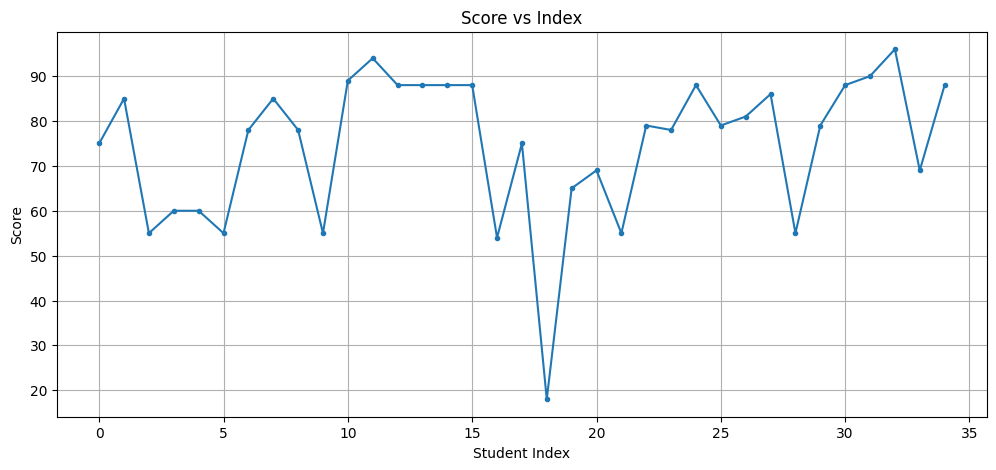

In [51]:
# Use the stats DataFrame
# Ensure df_stats exists
if 'df_stats' in locals() and not df_stats.empty:
    df_viz = df_stats.copy()

    # Plot score vs index
    df_viz['score'].plot(kind='line', marker='.', linestyle='-', title='Score vs Index', figsize=(12, 5))
    plt.xlabel('Student Index')
    plt.ylabel('Score')
    plt.grid(True)
    plt.show()
else:
    print("Visualization data not available.")
    df_viz = pd.DataFrame() # Create empty df

### 4.2 Bar Plots (`.plot.bar()` or `.plot(kind='bar')`)

Compare average scores or counts across categories.

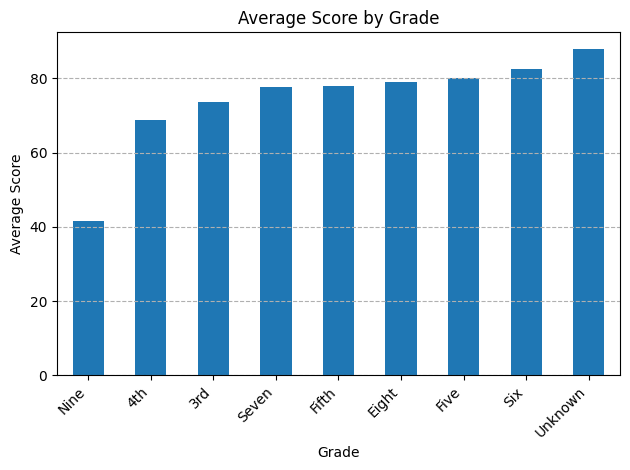

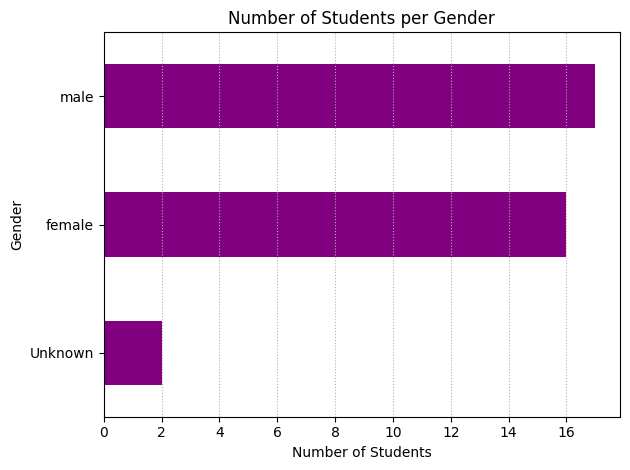

In [52]:
if not df_viz.empty:
    # Bar plot of average score per grade
    avg_score_by_grade = df_viz.groupby('grade')['score'].mean().sort_values()
    avg_score_by_grade.plot(kind='bar', title='Average Score by Grade')
    plt.xlabel('Grade')
    plt.ylabel('Average Score')
    plt.xticks(rotation=45, ha='right')
    plt.grid(axis='y', linestyle='--')
    plt.tight_layout()
    plt.show()

    # Horizontal Bar plot showing student counts per gender
    gender_counts = df_viz['gender'].value_counts().sort_values()
    gender_counts.plot(kind='barh', title='Number of Students per Gender', color='purple')
    plt.xlabel('Number of Students')
    plt.ylabel('Gender')
    plt.grid(axis='x', linestyle=':')
    plt.tight_layout()
    plt.show()
else:
    print("Visualization data not available.")

### 4.3 Histograms (`.plot.hist()` or `.plot(kind='hist')`)

Show the distribution of numerical data like `score`.

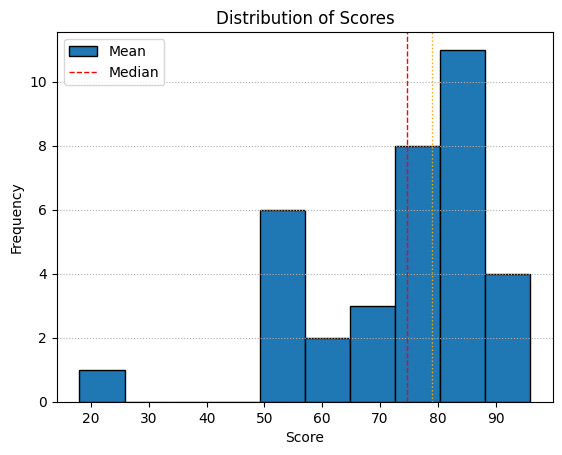

In [53]:
if not df_viz.empty:
    # Histogram of scores
    df_viz['score'].plot(kind='hist', bins=10, title='Distribution of Scores', edgecolor='black')
    plt.xlabel('Score')
    plt.ylabel('Frequency')
    plt.axvline(df_viz['score'].mean(), color='red', linestyle='dashed', linewidth=1)
    plt.axvline(df_viz['score'].median(), color='orange', linestyle='dotted', linewidth=1)
    plt.legend({'Mean':df_viz['score'].mean(), 'Median':df_viz['score'].median()})
    plt.grid(axis='y', linestyle=':')
    plt.show()
else:
    print("Visualization data not available.")

### 4.4 Scatter Plots (`.plot.scatter()` or `.plot(kind='scatter')`)

Explore relationship between two numerical variables (here, only `id` and `score`).

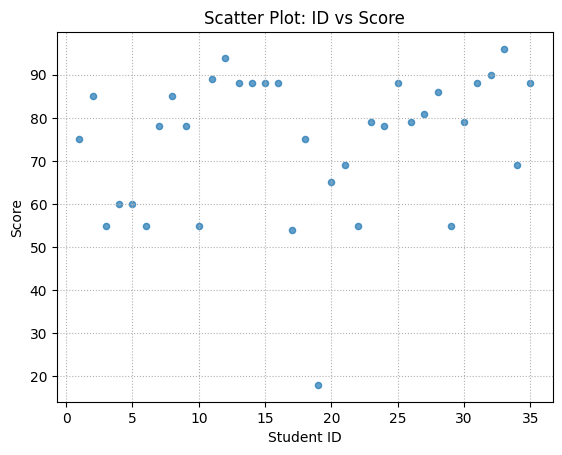


Scatter plot using seaborn (color-coded by Gender):


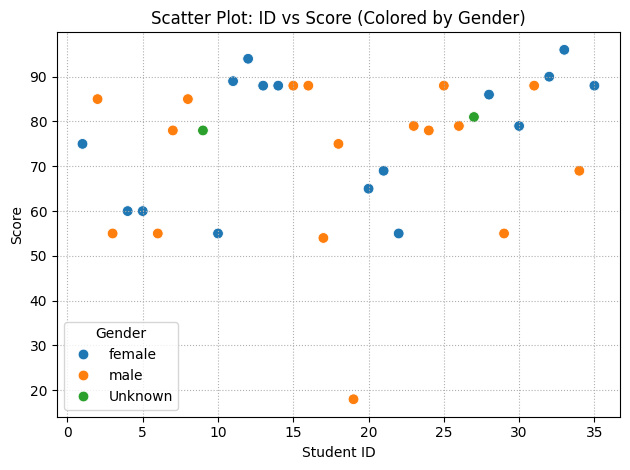

In [54]:
if not df_viz.empty and 'id' in df_viz.columns and 'score' in df_viz.columns:
    # Scatter plot of id vs score
    df_viz.plot(kind='scatter', x='id', y='score', title='Scatter Plot: ID vs Score', alpha=0.7)
    plt.xlabel('Student ID')
    plt.ylabel('Score')
    plt.grid(True, linestyle=':')
    plt.show()

    # Using seaborn for potentially more informative scatter plot (color by gender)
    print("\nScatter plot using seaborn (color-coded by Gender):")
    sns.scatterplot(data=df_viz, x='id', y='score', hue='gender', s=60)
    plt.title('Scatter Plot: ID vs Score (Colored by Gender)')
    plt.xlabel('Student ID')
    plt.ylabel('Score')
    plt.grid(True, linestyle=':')
    plt.legend(title='Gender')
    plt.tight_layout()
    plt.show()
else:
    print("Visualization data not available or missing 'id'/'score' columns.")

## Group Activities

Now practice with the `student.csv` data! Use `df_cleaned` or `df_transformed` as your base.

### Activity 1: Data Cleaning Challenge

1.  **Introduce & Detect:** Create a copy of `df` (original loaded data). Find the row where `id` is 15. Set the `score` for this row to `NaN`. Verify the missing value using `isnull().sum()`.
2.  **Impute:** Fill the missing score you just created using the *mean* score of students in the *same grade* ('Seven' in this case, but find it programmatically) as the student with `id` 15.
3.  **Replace:** Standardize all grade names containing 'Fif', 'Six', 'Sev', 'Eig', 'Nin' to just the digit (e.g., 'Fifth' -> '5', 'Six' -> '6', etc.). Use `.str.replace()` or multiple `.replace()` calls.
4.  **Duplicates:** Check if there are any duplicate rows based on the `name` column. If so, display them.
5.  **Whitespace:** Add extra spaces around some names (e.g., ` ' John Deo ' `) in a copy of the DataFrame and then use `.str.strip()` on the `name` column.

### Activity 2: Data Transformation Tasks

1.  **New Column:** Create a column 'score_category' based on score: 'Excellent' (>=90), 'Good' (>=75), 'Average' (>=60), 'Needs Improvement' (<60). (Hint: `pd.cut` or multiple `np.where` calls).
2.  **Filtering:** Select all 'male' students who are in grade 'Seven' or have a score below 55. Display their `id`, `name`, `grade`, `score`.
3.  **Grouping & Aggregation:** Group by `grade` and find the *minimum* and *maximum* score for each grade.
4.  **Sorting:** Sort the DataFrame primarily by `gender` (alphabetical) and secondarily by `score` (highest first). Display the top 10 rows.
5.  **Selection:** Using `.loc`, select all rows where the `grade` is 'Six' and show only the `name` and `score` columns.

### Activity 3: Statistical Exploration

1.  **Describe by Group:** Use `.groupby('gender')` and apply `.describe()` to the `score` column.
2.  **Median per Group:** Find the median `score` for each `grade`.
3.  **Mode:** What is the most frequent `score` in the dataset? What is the most frequent `grade`?
4.  **Range:** Calculate the range (max - min) of scores for the entire dataset.

### Activity 4: Visualization Practice

1.  **Histogram:** Create a histogram of `score` only for 'female' students.
2.  **Bar Plot:** Create a bar plot showing the *count* of students in each `grade`.
3.  **Scatter Plot:** Create a scatter plot comparing `id` (x-axis) vs `score` (y-axis). Color the points based on `pass_fail` status.
4.  **(Challenge) Box Plot:** Create a box plot showing the distribution of `score` for each `gender`. Use `df.boxplot(column='score', by='gender')` or `sns.boxplot(x='gender', y='score', data=df_transformed)`.

## Best Practices Recap

As you write more Python code, especially for data analysis, keep these practices in mind:

1.  **Clear Variable Names:** Use descriptive names for DataFrames and variables (e.g., `df_cleaned`, `average_score`, `female_students`).
2.  **Comments:** Explain the *why* behind your code, not just the *what*. Comment complex steps, assumptions, or the purpose of specific analyses.
    ```python
    # Calculate the mean score for 'Seven' grade to impute a missing value
    mean_score_grade7 = df[df['grade'] == 'Seven']['score'].mean()
    # Fill missing scores specifically for grade 'Seven'
    df.loc[(df['grade'] == 'Seven') & (df['score'].isnull()), 'score'] = mean_score_grade7
    ```
3.  **Code Formatting:** Follow PEP 8 guidelines for Python code style (consistent indentation using 4 spaces, appropriate spacing, reasonable line length). Tools like Black or Flake8 can help.
4.  **Use Markdown Cells:** Explain your methodology, steps, findings, and the structure of your analysis using markdown cells. This turns your notebook into a readable report.
5.  **Work on Copies:** When performing significant cleaning or transformation steps, use `df.copy()` to create a copy. This preserves your original data and allows you to easily compare different approaches or backtrack if needed.
6.  **Check Intermediary Steps:** After important operations (like merging, complex filtering, or imputation), use `.head()`, `.info()`, `.shape`, or `.isnull().sum()` to verify the results are as expected before proceeding.

## End of Day 3

Congratulations! You've worked through loading, exploring, cleaning, transforming, analyzing, and visualizing data using pandas with a real dataset. These are essential skills for any data analyst or scientist using Python.

Keep practicing, and don't hesitate to explore the extensive pandas documentation for even more capabilities!